# Projet NUM - Circuit électrique

## Travail à effectuer :

### Partie 1 :

♦ Proposez une résolution numérique de ce problème, en utilisant plusieurs schémas.

♦ Une étude systématique de la convergence en fonction du maillage sera effectuée pour chaque
schéma.

♦ Vous discuterez de la pertinence de chacun des choix que vous ferez en terme de consistance et de
stabilité.

### Partie 2 :

♦ Les fils du circuit ne sont pas en cuivre mais en fer : on ne peut pas négliger le fait que la
température augmente dans la résistance, proportionnellement à l’intensité électrique. Or, la
résistivité augment proportionnellement à la température. On étudiera la réponse d’une résistance
satisfaisant $R(t) = 104 * i(t)$.

♦ Ecrire la nouvelle équation différentielle (non-linéaire) à résoudre.

♦ Proposer une résolution numérique de ce problème.

♦ Menez une analyse numérique pertinente pour justifier votre résultat

### Variables et bibliothèques :

In [1]:
# Importation des bibliothèques :

import numpy as np
import matplotlib.pyplot as plt


# Définition des variables :

L = 1           # inductance bobine
R = 10          # résistance
C = 0.0025      # capacité condensateur
E_a = -0.08     # amplitude tension générateur
w = 2.5         # pulsation tension générateur (oméga)
t_debut = 0
t_fin = 5       # étude des 5 premières secondes


# Conditions initiales :

i0 = 0          # courant à t=0
di0 = 0.1       # dérivée du courant à t=0



### Equations du problème :    

$$ L \frac{di}{dt} + Ri+\frac{1}{C}q = E_a \times cos(\omega t) $$

En dérivant :

$$ \frac{d^2i}{dt^2} = \frac{-R}{L}\frac{di}{dt}+\frac{-1}{LC}i + \frac{E_a \omega}{L}sin(\omega t)$$

Le problème se pose sous la forme : 
$
\left\{
    \begin{array}{l}
        \frac{di}{dt} = v \\
        \frac{dv}{dt} = \frac{-R}{L}v+\frac{-1}{LC}i + \frac{E_a \omega}{L}sin(\omega t)
    \end{array}
\right.
$
où v est une variable intermédiaire.

Le vecteur  $
Y = 
\begin{bmatrix}
    i \\
    v
\end{bmatrix}
$ 
représente l'état du système, tandis que 
$ 
F(t_n, Y_n) =
\begin{bmatrix}
    v_n \\
    \frac{-R}{L}v_n + \frac{-1}{LC}i_n + \frac{E_a \omega}{L}\sin(\omega t_n)
\end{bmatrix}
$ 
représente la fonction dérivée du vecteur Y. 

Une fois le modèle choisi appliqué à notre problème, il peut être utile de déterminer sa stabilité s'il s'agit d'un modèle explicite. Pour cela, nous cherchons à l'exprimer sous la forme $ Y_{n+1} = CY_n $ où $C$ représente la matrice d'amplification. Le modèle est dit stable si le rayon spectral $ \rho = max(\lambda_1, \lambda_2, ..., \lambda_x) $ est strictement inférieur à 1. Il convient également de déterminer le nombre d'itérations (lié au pas du modèle) minimal permettant d'atteindre cette stabilité. 

## Partie 1 :

### Euler explicite

Modèle exprimé sous la forme : $ Y_{n+1} = Y_n + F(t_n, Y_n) $

Nous obtenons donc comme expression à implémenter : 
$$
\left\{
\begin{array}{l}
i_{n+1} = i_n + \Delta t \times v_n \\
v_{n+1} = v_n + \Delta t \left( \frac{-R}{L} v_n + \frac{-1}{LC} i_n + \frac{E_a \omega}{L} \sin(\omega t_n) \right)
\end{array}
\right.
$$



In [2]:
# Elements d'initialisation des modèles :
nombre_points = 1000

# calcul de la dérivée seconde du courant
def derivee_seconde (i, di, t): 
  return (-R*di - i/C + (E_a * w * np.sin(w*t)))/L 

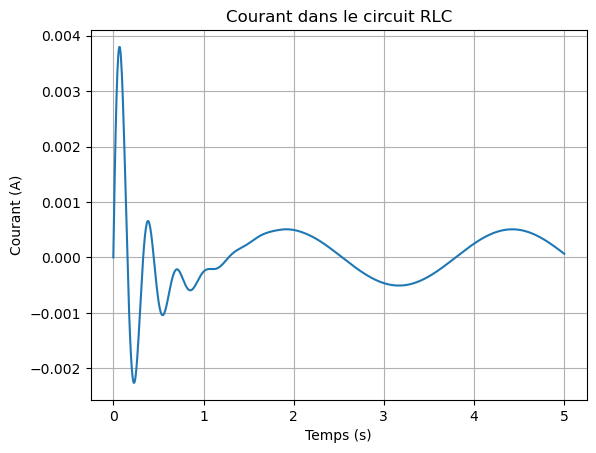

In [ ]:
def euler_explicite (nombre_points): #création de la fonction Euler explicite
  temps = np.linspace(t_debut, t_fin, nombre_points)  #Vecteur contenant tous les temps discretisés
  dt = temps[1] - temps[0]                            #définition du pas de temps 

  i = np.zeros(nombre_points)   #création d'un vecteur vide, de longueur le nombre de points que l'on veut, dans lequel on va venir stocker chaque étape de notre programme
  di = np.zeros(nombre_points)  #Idem pour sa dérivée
  i[0] = i0                     
  di[0] = di0
  

  for k in range(nombre_points-1): 
    ddi = derivee_seconde(i[k], di[k], k*dt)
    di[k+1] = di[k] + dt * ddi                # vn
    i[k+1] = i[k] + dt * di[k]                # in

  return temps, i



temps, courant = euler_explicite(nombre_points)

plt.plot(temps, courant)
plt.title("Courant dans le circuit RLC")
plt.xlabel("Temps (s)")
plt.ylabel("Courant (A)")
plt.grid()
plt.show()

In [4]:
# Etude de la consistance de ce modèle

dt = (t_fin - t_debut) / nombre_points  # pas de temps
mat_A = np.array([[0, 1],
             [-1/(L*C), -R/L]])
mat_C_exp = dt*mat_A + np.eye(2)        # matrice d'amplification

l1, l2 = np.linalg.eig(mat_C_exp)[0] 
l1 = np.linalg.norm(l1)
l2 = np.linalg.norm(l2)
R_spectral = np.max([l1, l2]) 

print(f"Rayon spectral de la matrice d'amplification : {R_spectral}")
if R_spectral < 1:
    print("Le problème est donc stable.")
else:
    print("Le problème est donc instable.")



Rayon spectral de la matrice d'amplification : 0.9797958971132712
Le problème est donc stable.


### Euler implicite

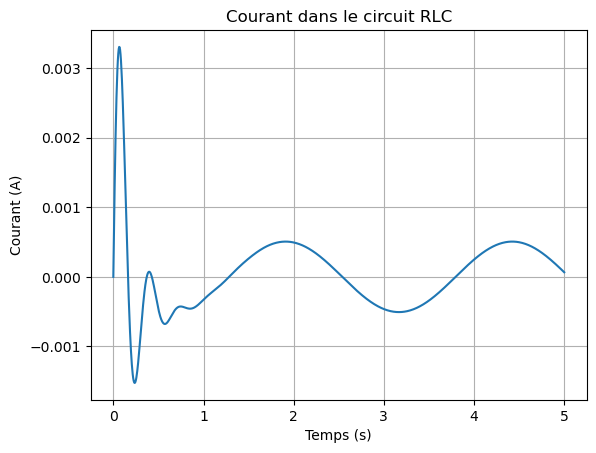

In [5]:
def euler_implicite (nombre_points):
    temps = np.linspace(t_debut, t_fin, nombre_points)  #Vecteur contenant tous les temps discretisés
    dt = temps[1] - temps[0]                            #définition du pas de temps 

    i = np.zeros(nombre_points)   #création d'un vecteur vide, de longueur le nombre de points que l'on veut, dans lequel on va venir stocker chaque étape de notre programme
    di = np.zeros(nombre_points)  #Idem pour sa dérivée
    i[0] = i0                     
    di[0] = di0

    for k in range(1, nombre_points):
        A = np.array([[1, -dt],
                  [dt / (L * C), 1 + dt * R / L]])
        B = np.array([i[k-1], di[k-1] + dt * (E_a * w * np.sin(w * temps[k])) / L])
        i[k], di[k] = np.linalg.solve(A, B)

    return temps, i

temps, courant = euler_implicite(nombre_points)

plt.plot(temps, courant)
plt.title("Courant dans le circuit RLC")
plt.xlabel("Temps (s)")
plt.ylabel("Courant (A)")
plt.grid()
plt.show()

Le modèle Euler implicite est stable quel que soit le pas de temps choisi.

### Modèle de Heun




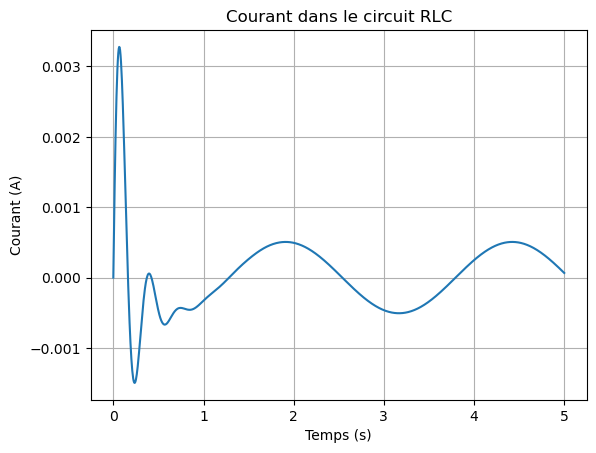

In [6]:
def heun (nombre_points):
    temps = np.linspace(t_debut, t_fin, nombre_points)  #Vecteur contenant tous les temps discretisés
    dt = temps[1] - temps[0]                            #définition du pas de temps 

    i = np.zeros(nombre_points)   #création d'un vecteur vide, de longueur le nombre de points que l'on veut, dans lequel on va venir stocker chaque étape de notre programme
    di = np.zeros(nombre_points)  #Idem pour sa dérivée
    i[0] = i0                     
    di[0] = di0

    for k in range(1, nombre_points):
        # Calcul de la dérivée seconde à l'étape k
        ddi = derivee_seconde(i[k-1], di[k-1], (k-1)*dt)
        
        # Estimation de la dérivée seconde à l'étape k+1
        ddi_estime = derivee_seconde(i[k-1] + dt*di[k-1], di[k-1] + dt*ddi, k*dt)
        
        # Mise à jour des valeurs i et di
        di[k] = di[k-1] + dt * ddi_estime
        i[k] = i[k-1] + dt * di[k]
        
    return temps, i
        

temps, courant = heun(nombre_points)

plt.plot(temps, courant)
plt.title("Courant dans le circuit RLC")
plt.xlabel("Temps (s)")
plt.ylabel("Courant (A)")
plt.grid()
plt.show()


    

In [7]:
# étude de la consistance de la méthode de Heun

dt = (t_fin - t_debut) / nombre_points  # pas de temps
mat_A = np.array([[0, 1],
                  [-1/(L*C), -R/L]])
# Matrice d'amplification pour la méthode de Heun
mat_C_heun = np.eye(2) + dt * mat_A + (dt / 2) * np.dot(mat_A, (np.eye(2) + dt * mat_A))

# Calcul des valeurs propres
l1, l2 = np.linalg.eig(mat_C_heun)[0]
l1 = np.linalg.norm(l1)
l2 = np.linalg.norm(l2)
R_spectral_heun = np.max([l1, l2])

print(f"Rayon spectral de la matrice d'amplification (Heun) : {R_spectral_heun}")
if R_spectral_heun < 1:
    print("Le modèle de Heun est donc stable.")
else:
    print("Le modèle de Heun est donc instable.")


Rayon spectral de la matrice d'amplification (Heun) : 0.9687104830649867
Le modèle de Heun est donc stable.


### RK2

On définit le schéma RK2 pour ce système comme : 

$ Y_{i+1} = Y_i + \frac{dt}{2} (k_1 + k_2) $

où 

$ k_1 = F(t_i, Y_i) $ 

$ k_2 = F(t_i + dt, Y_i + dt \times k_1) $

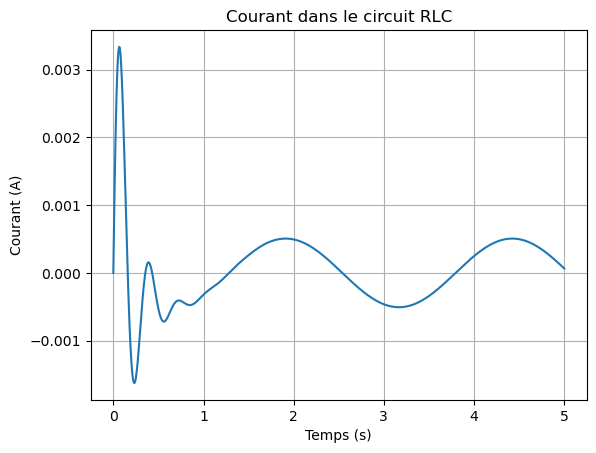

In [8]:
def RK2 (nombre_points):
  temps = np.linspace(t_debut, t_fin, nombre_points)
  dt = temps[1] - temps[0]

  i = np.zeros(nombre_points)
  di = np.zeros(nombre_points)
  i[0] = i0
  di[0] = di0

  for k in range(1, nombre_points):
    # Calcul des pentes
    k1 = derivee_seconde(i[k-1], di[k-1], temps[k-1])
    k2 = derivee_seconde(i[k-1] + dt/2 * di[k-1], di[k-1] + dt/2 * k1, temps[k-1] + dt/2)
    
    # Mise à jour des valeurs
    di[k] = di[k-1] + dt * k2
    i[k] = i[k-1] + dt * di[k]

  return temps, i


temps, courant = RK2(nombre_points)
plt.plot(temps, courant)
plt.title("Courant dans le circuit RLC")
plt.xlabel("Temps (s)")
plt.ylabel("Courant (A)")
plt.grid()
plt.show()


In [9]:
# étude de la consistance du modèle RK2

dt = (t_fin - t_debut) / nombre_points  # pas de temps
mat_A = np.array([[0, 1],
                  [-1/(L*C), -R/L]])

# Matrice d'amplification pour RK2
mat_C_RK2 = np.eye(2) + dt * mat_A + (dt**2 / 2) * np.dot(mat_A, mat_A)

# Calcul des valeurs propres
l1, l2 = np.linalg.eig(mat_C_RK2)[0]
l1 = np.linalg.norm(l1)
l2 = np.linalg.norm(l2)
R_spectral_RK2 = np.max([l1, l2])

print(f"Rayon spectral de la matrice d'amplification (RK2) : {R_spectral_RK2}")
if R_spectral_RK2 < 1:
    print("Le modèle RK2 est donc stable.")
else:
    print("Le modèle RK2 est donc instable.")



Rayon spectral de la matrice d'amplification (RK2) : 0.9752051066314205
Le modèle RK2 est donc stable.


### Crank-Nicolson

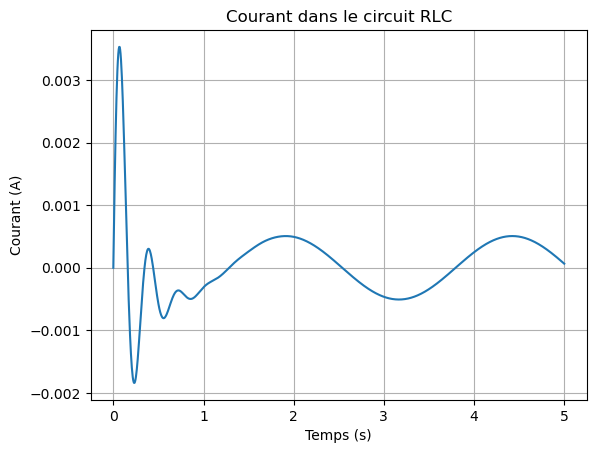

In [10]:
def crank_nicholson (nombre_points):
    temps = np.linspace(t_debut, t_fin, nombre_points)
    dt = temps[1] - temps[0]

    i = np.zeros(nombre_points)
    di = np.zeros(nombre_points)
    i[0] = i0
    di[0] = di0

    for k in range(1, nombre_points):
        # Calcul de la dérivée seconde à l'étape k
        ddi = derivee_seconde(i[k-1], di[k-1], temps[k-1])
        
        # Estimation de la dérivée seconde à l'étape k+1
        ddi_estime = derivee_seconde(i[k-1] + dt*di[k-1], di[k-1] + dt*ddi, temps[k])
        
        # Mise à jour des valeurs i et di
        di[k] = di[k-1] + (dt/2) * (ddi + ddi_estime)
        i[k] = i[k-1] + (dt/2) * (di[k-1] + di[k])
    
    return temps, i

temps, courant = crank_nicholson(nombre_points)
plt.plot(temps, courant)
plt.title("Courant dans le circuit RLC")
plt.xlabel("Temps (s)")
plt.ylabel("Courant (A)")
plt.grid()
plt.show()


Le modèle Crank-Nicolson est stable quel que soit le pas de temps choisi. Théoriquement, le modèle est stable à partir d'un nombre d'itérations $N = 1$ mais un nombre plus important d'itérations est nécessaire pour garantir sa pertinence. 

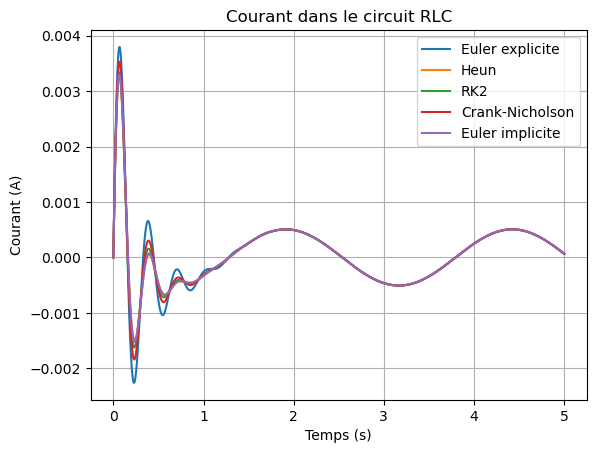

In [16]:
t1, i1 = euler_explicite(nombre_points)
t2, i2 = heun(nombre_points)
t3, i3 = RK2(nombre_points)
t4, i4 = crank_nicholson(nombre_points)
t5, i5 = euler_implicite(nombre_points)
plt.plot(t1, i1, label="Euler explicite")
plt.plot(t2, i2, label="Heun")
plt.plot(t3, i3, label="RK2")
plt.plot(t4, i4, label="Crank-Nicholson")
plt.plot(t5, i5, label="Euler implicite")
plt.title("Courant dans le circuit RLC")
plt.xlabel("Temps (s)")
plt.ylabel("Courant (A)")
plt.legend()
plt.grid()
plt.show()

## Etude de la stabilité pour les méthodes précédentes

Euler explicite : Le nombre de points minimal pour la stabilité est 201.
RK2 : Le nombre de points minimal pour la stabilité est 67.
Heun : Le nombre de points minimal pour la stabilité est 167.


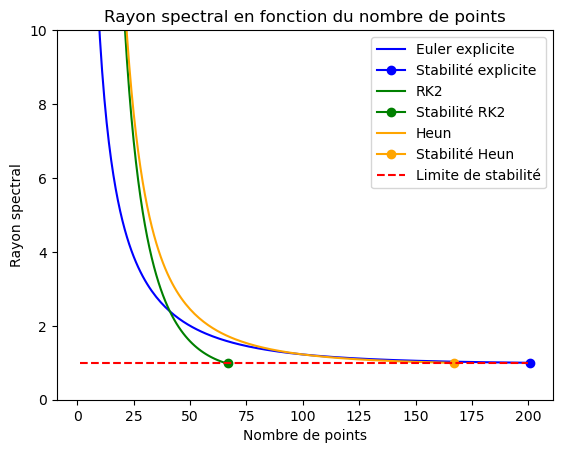

In [12]:
def N_mini(mat_C, dt, modele):
    '''
    Fonction qui renvoie le nombre de points minimal pour la stabilité du modèle
    Renvoie aussi le rayon spectral et le nombre de points à chaque test jusqu'à atteinte de la stabilité
    '''
    N_stabilite = 1
    Rs_test = 2
    Rs = []
    N = []
    while Rs_test > 1:
        dt = (t_fin - t_debut) / N_stabilite # pas de temps
        mat_A = np.array([[0, 1],
                        [-1/(L*C), -R/L]])
        if modele == "explicite":
            mat_C = dt*mat_A + np.eye(2)                                        # matrice d'amplification explicite
        elif modele == "RK2":
            mat_C = np.eye(2) + dt * mat_A + (dt**2 / 2) * np.dot(mat_A, mat_A) # matrice d'amplification RK2
        elif modele == "Heun":
            mat_C = np.eye(2) + dt * mat_A + (dt / 2) * np.dot(mat_A, (np.eye(2) + dt * mat_A)) # matrice d'amplification Heun
        l1, l2 = np.linalg.eig(mat_C)[0] 
        l1 = np.linalg.norm(l1)
        l2 = np.linalg.norm(l2)
        Rs_test = np.max([l1, l2])
        Rs.append(Rs_test)                  # on stocke le rayon spectral
        N.append(N_stabilite)               # on stocke le nombre de points   
        N_stabilite += 1                    
    return N, Rs, N_stabilite

dt = (t_fin - t_debut) / nombre_points  # pas de temps




# Rs Euler explicite
N_exp, Rs_exp, N_stab_exp = N_mini(mat_C_exp, dt, "explicite")
plt.plot(N_exp, Rs_exp, label='Euler explicite', color='blue')
plt.plot(N_stab_exp, Rs_exp[N_stab_exp-2], color='blue', marker='o', label='Stabilité explicite')

# Rs RK2
N_RK2, Rs_RK2, N_stab_RK2 = N_mini(mat_C_RK2, dt, "RK2")
plt.plot(N_RK2, Rs_RK2, label='RK2', color='green')
plt.plot(N_stab_RK2, Rs_RK2[N_stab_RK2-2], color='green', marker='o', label='Stabilité RK2')

# Rs Heun
N_heun, Rs_heun, N_stab_heun = N_mini(mat_C_heun, dt, "Heun")
plt.plot(N_heun, Rs_heun, label='Heun', color='orange')
plt.plot(N_stab_heun, Rs_heun[N_stab_heun-2], color='orange', marker='o', label='Stabilité Heun')

print(f"Euler explicite : Le nombre de points minimal pour la stabilité est {N_stab_exp}.")
print(f"RK2 : Le nombre de points minimal pour la stabilité est {N_stab_RK2}.")
print(f"Heun : Le nombre de points minimal pour la stabilité est {N_stab_heun}.")

# Tracé de la limite de stabilité
N_max = max(N_stab_exp, N_stab_RK2, N_stab_heun) + 1
plt.plot(N_exp, np.ones(len(N_exp)), 'r--', label='Limite de stabilité')

# Légendes et ajouts
plt.title("Rayon spectral en fonction du nombre de points")
plt.xlabel("Nombre de points")
plt.ylabel("Rayon spectral")
plt.ylim(0, 10)                     # Limite affichage axe vertical (sinon trop grand et pas lisible)
plt.legend()





## Partie 2 